In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [476]:
dataset = pd.read_csv('C:/Users/bahld/python programs/Stats_New/linear regression/Advertising.csv')

In [477]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [478]:
dataset.shape

(200, 5)

In [479]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [480]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)

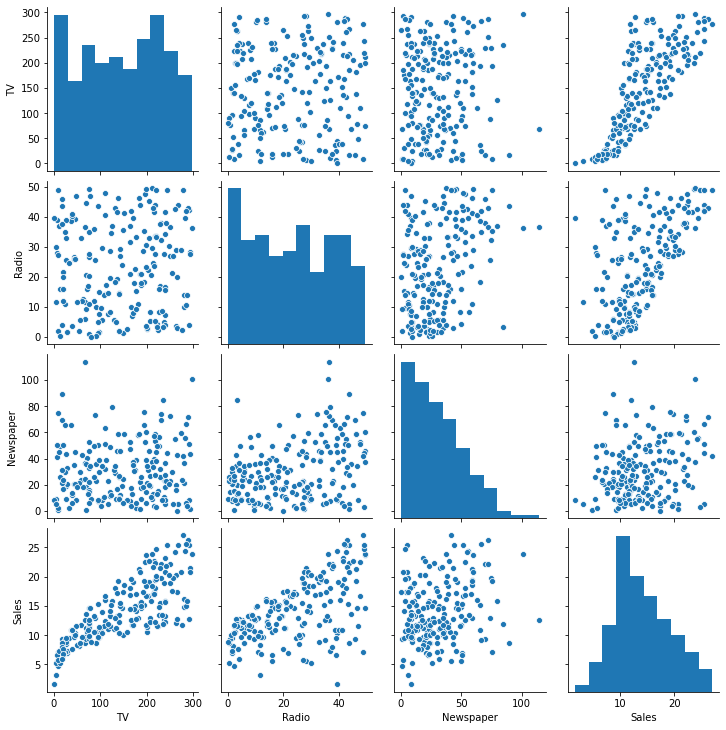

In [481]:
sns.pairplot(dataset)

In [482]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [483]:
dataset.loc[outliers_iqr(dataset["Newspaper"])]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [484]:
datset=dataset.drop(dataset.loc[outliers_iqr(dataset["Newspaper"])].index)

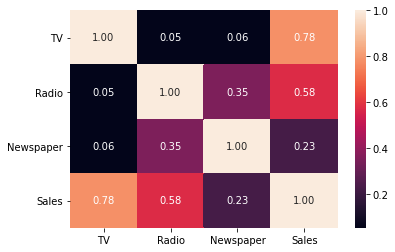

In [485]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

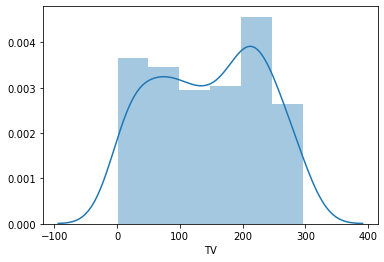

In [486]:
sns.distplot(dataset['TV'])

In [487]:
#Newspaper and Radio are multicolinear so adding new coloumn interaction_term=Radio*Newspaper
dataset['interaction_term']=dataset['TV']*dataset['Radio']


In [488]:
dataset.head()

,TV,Radio,Newspaper,Sales,interaction_term
0,230.1,37.8,69.2,22.1,8697.78
1,44.5,39.3,45.1,10.4,1748.85
2,17.2,45.9,69.3,9.3,789.48
3,151.5,41.3,58.5,18.5,6256.95
4,180.8,10.8,58.4,12.9,1952.64


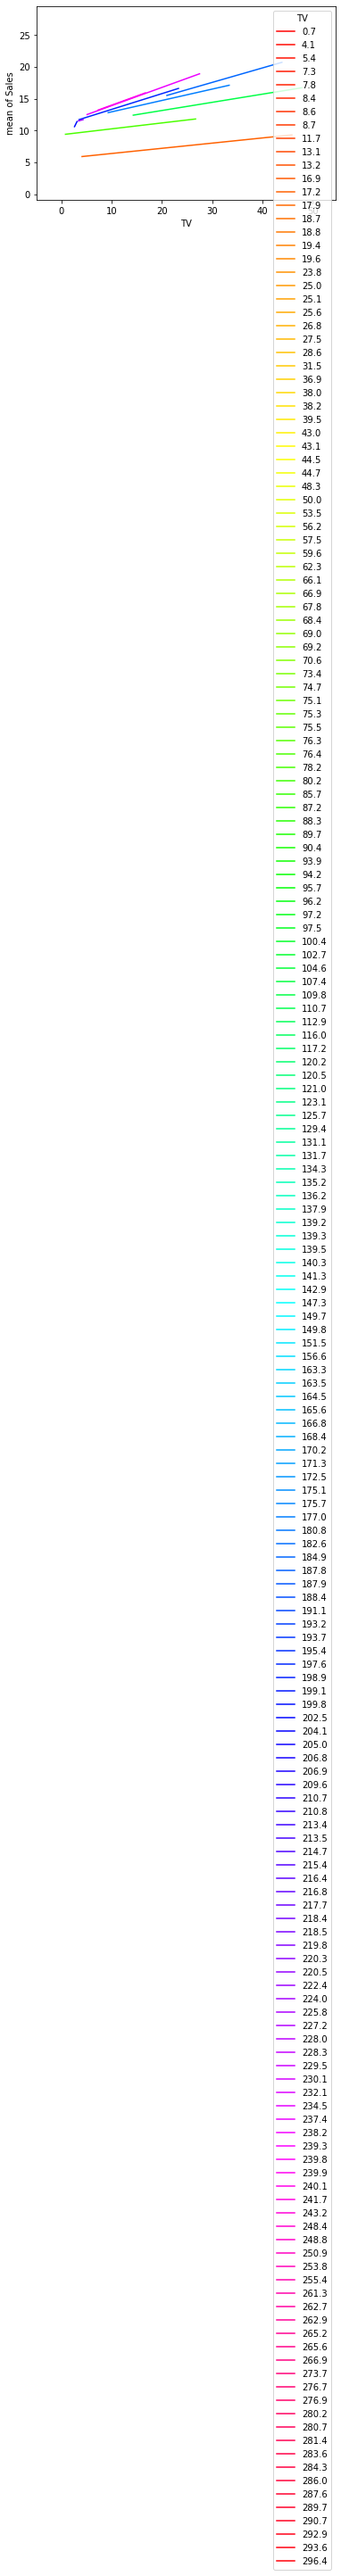

In [553]:

#plt.plot(dataset['TV'].mean(),dataset['Sales'].mean(), linestyle=lid')
#plt.plot(dataset['Radio'],dataset['Sales'], linestyle='solid')

from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot (dataset['Radio'], dataset['TV'] ,dataset['Sales'],plottype='l', ylabel='Sales', xlabel='TV',ms=10,legendloc='best')
#fig = interaction_plot(Income, Gender, Fit6.fittedvalues,
#             colors=['red','blue'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
#fig = interaction_plot(Income, Gender, Fit7.fittedvalues,
#             colors=['green','orange'], markers=['D','^'], ylabel='Consumption', xlabel='Income')

import matplotlib.pyplot as plt
plt.show()


In [489]:


X = dataset[['TV','Radio','interaction_term']]
y = dataset['Sales']

In [490]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [491]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [492]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.019567
Radio,0.026810
interaction_term,0.001094


In [493]:
regressor.intercept_

6.691600998458959

In [494]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
5,7.2,8.638288
154,15.6,15.267256
173,11.7,11.485125
187,17.3,17.200727
108,5.3,6.964385
...,...,...
145,10.3,9.779426
87,16.0,14.863303
192,5.9,7.215226
131,12.7,12.799922


Text(0, 0.5, 'Residuals')

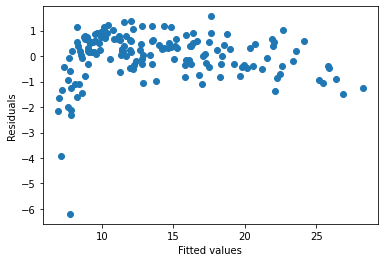

In [495]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [496]:
(y_train-y_pred).mean()

1.0103029524088924e-15

Text(0.5, 0, 'Residuals')

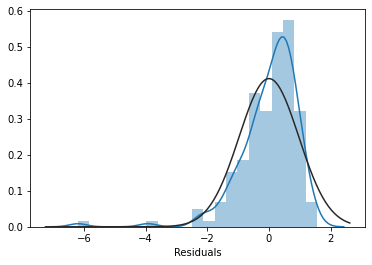

In [497]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

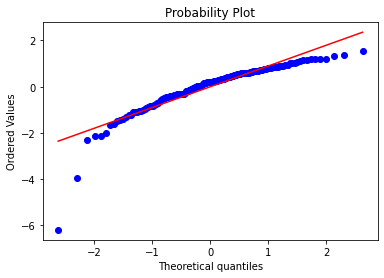

In [498]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [499]:
import statsmodels.api as sm

In [500]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

In [501]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [502]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):          2.72e-114
Time:                        01:04:08   Log-Likelihood:                -222.10
No. Observations:                 160   AIC:                             452.2
Df Residuals:                     156   BIC:                             464.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6916      0.281     23.822      0.000       6.137       7.246
TV                   0.0196      0.002     11.268      0.000       0.016       0.023
Radio                0.0268      0.010      2.643      0.009       0.007       0.047
interaction_term     0.0011   6.02e-05     18.163      0.000       0.001       0.001
==============================================================================
Omnibus:                      105.084   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              860.300
Skew:                          -2.307   Prob(JB):                    1.54e-187
Kurtosis:                      13.380   Cond. No.                     1.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [503]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.6224053510509825
Mean Squared Error: 0.618299746399218
Root Mean Squared Error: 0.7863203840669641


In [504]:
y_pred1 = res.fit().predict(X_test)


ValueError: shapes (40,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [ ]:
y_test